<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 4</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Sebastian Fuentes Araneda</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

## 1. Realiza la operación de convolución

<p align="justify">
Una de las operaciones más comunes en tratamiento de imagenes, video etc, es la convolución. Comienza por realizar una convolución entre una señal Pulso y una función impulso filtrada.


<center><img src="../../assets/scipy-signal-convolution.png"/></center>


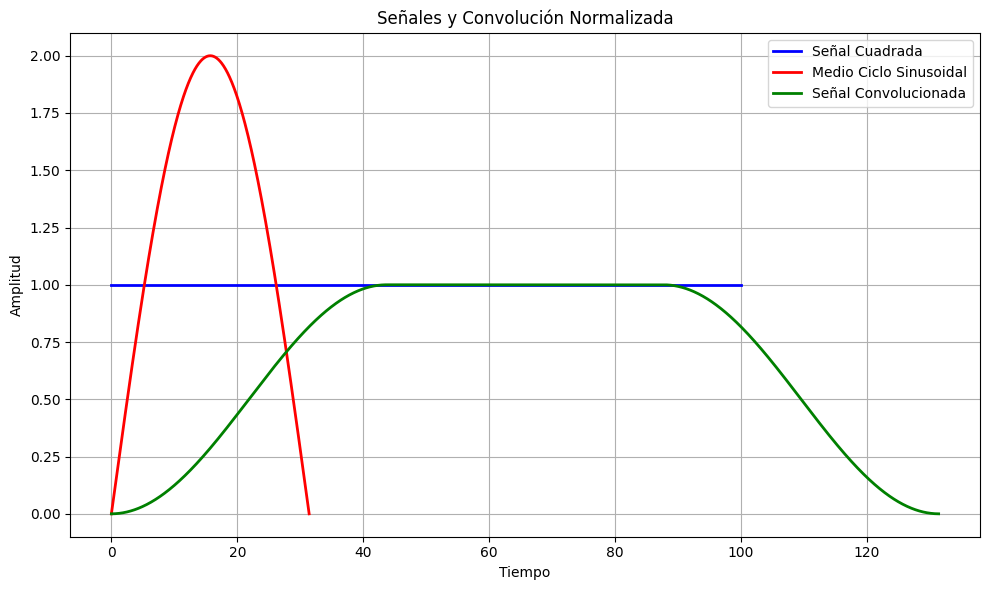

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal cuadrada
amplitud_cuadrada = 1
duracion_cuadrada = 100

# Parámetros de la señal sinusoidal
amplitud_sinusoidal = 2
frecuencia_sinusoidal = 0.1

# Generamos la señal cuadrada
t_cuadrada = np.linspace(0, duracion_cuadrada, 1000)
senal_cuadrada = amplitud_cuadrada * np.ones_like(t_cuadrada)

# Generamos medio ciclo de la señal sinusoidal
t_sinusoidal = np.linspace(0, np.pi / frecuencia_sinusoidal, 500)
senal_sinusoidal = amplitud_sinusoidal * np.sin(frecuencia_sinusoidal * t_sinusoidal)

# Convolución manual
senal_convolucionada = np.convolve(senal_cuadrada, senal_sinusoidal, mode='full')

# Normalizamos la señal convolucionada
senal_convolucionada /= np.max(senal_convolucionada) / amplitud_cuadrada

# Ajustamos el tiempo para la señal convolucionada
t_convolucion = np.linspace(0, duracion_cuadrada + np.pi / frecuencia_sinusoidal, len(senal_convolucionada))

# Gráfico de las señales
plt.figure(figsize=(10, 6))

plt.plot(t_cuadrada, senal_cuadrada, label='Señal Cuadrada', color='blue', linewidth=2)
plt.plot(t_sinusoidal, senal_sinusoidal, label='Medio Ciclo Sinusoidal', color='red', linewidth=2)
plt.plot(t_convolucion, senal_convolucionada, label='Señal Convolucionada', color='green', linewidth=2)

plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señales y Convolución Normalizada')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()


## 2. Cancelación de Ruido (Denoising)
<p align="justify">
Implementa un algoritmo para eliminar el ruido de una señal. Puedes apoyarte en esta referencia (https://www.youtube.com/watch?v=s2K1JfNR7Sc)

1. Debes tener la señal original
2. Debes agregar ruido a la señal
3. Obtener el valor medio de la señal con ruido
4. Implementar transformaciones y filtrado.
    


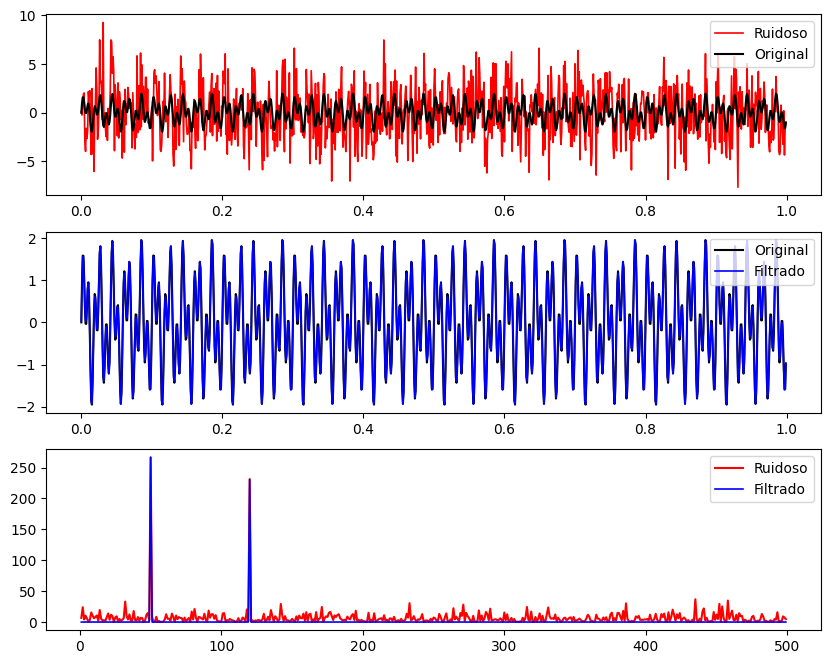

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Señal original
dt = 0.001
t = np.arange(0, 1, dt)
f = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t)

# 2. Agregar ruido
ruido = 2.5 * np.random.randn(len(t))
f_ruidosa = f + ruido

# 3. Valor medio de la señal con ruido
valor_medio = np.mean(f_ruidosa)

# 4. Transformada de Fourier y filtrado
L = np.s_[1:int(np.floor(n/2))]  # Corrección: usar np.s_ para slicing
n = len(t)
fhat = np.fft.fft(f_ruidosa, n)
PSD = fhat * np.conj(fhat) / n
freq = (1/(dt*n)) * np.arange(n)


# Umbral para el filtrado (ajustable)
umbral = 100
indices = PSD > umbral
PSD_limpia = PSD * indices
fhat_filtrada = indices * fhat
f_filtrada = np.fft.ifft(fhat_filtrada)

# 5. Gráficas
plt.figure(figsize=(10, 8))

plt.subplot(3,1,1)
plt.plot(t, f_ruidosa, 'r', linewidth=1.2, label='Ruidoso')
plt.plot(t, f, 'k', linewidth=1.5, label='Original')
plt.legend()

plt.subplot(3,1,2)
plt.plot(t, f, 'k', linewidth=1.5, label='Original')
plt.plot(t, f_filtrada, 'b', linewidth=1.2, label='Filtrado')
plt.legend()

plt.subplot(3,1,3)
plt.plot(freq[L], PSD[L], 'r', linewidth=1.5, label='Ruidoso')
plt.plot(freq[L], PSD_limpia[L], '-b', linewidth=1.2, label='Filtrado')
plt.legend()

plt.show()

## 3. Wavelets
### 3.1 Desarrolla una transformada wavelet 1D
<p align="justify">
Implementa transformaciones con 1-D wavelet usando la función Mexican Hat Wavelet.

$$m(x) = \frac{2}{\sqrt{3 \sigma} \pi^{\frac{1}{4}}} \left(1-\frac{x^2}{\sigma^2}\right) e^{\frac{-x^2}{2 \sigma^2}}$$


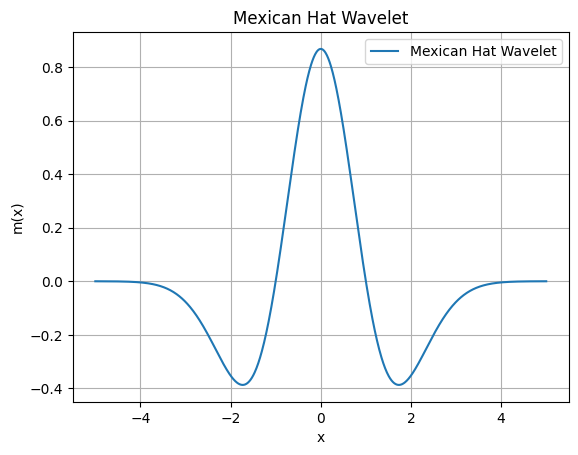

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def mexican_hat(x, mu, sigma):
    # Calcula la Mexican Hat Wavelet
    return (2 / (np.sqrt(3 * sigma) * np.pi**(1/4))) * (1 - (x**2 / sigma**2)) * np.exp(-x**2 / (2 * sigma**2))

# Definir el rango de valores para x
x = np.linspace(-5, 5, 1000)

# Definir los parámetros mu y sigma
mu = 0
sigma = 1

# Calcular la Mexican Hat Wavelet
wavelet = mexican_hat(x, mu, sigma)

# Graficar la Mexican Hat Wavelet
plt.plot(x, wavelet, label='Mexican Hat Wavelet')
plt.title('Mexican Hat Wavelet')
plt.xlabel('x')
plt.ylabel('m(x)')
plt.legend()
plt.grid(True)
plt.show()


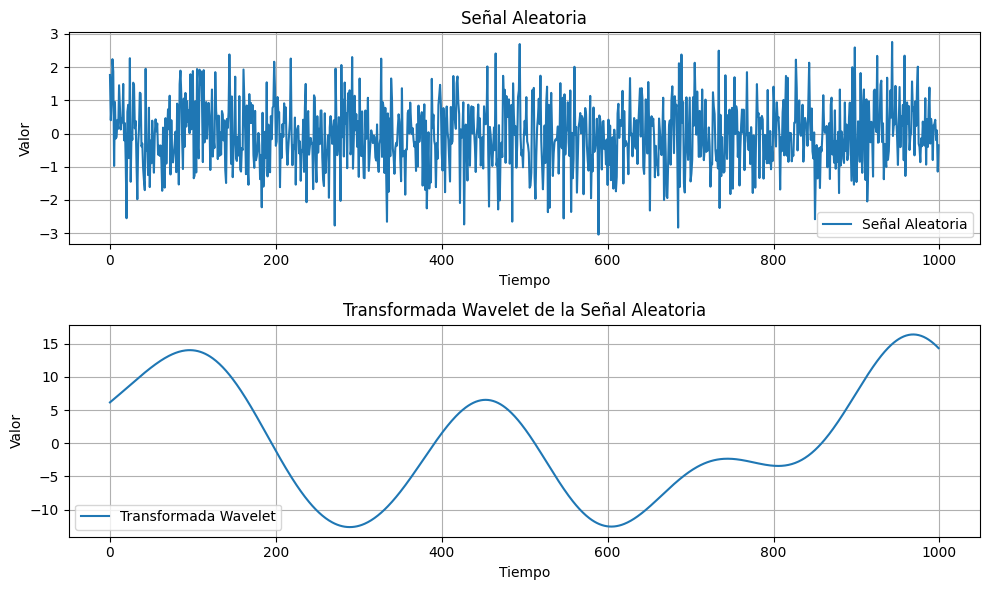

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def mexican_hat(x, mu, sigma):
    # Calcula la Mexican Hat Wavelet
    return (2 / (np.sqrt(3 * sigma) * np.pi**(1/4))) * (1 - (x**2 / sigma**2)) * np.exp(-x**2 / (2 * sigma**2))

# Definir el rango de valores para x
x = np.linspace(-5, 5, 1000)

# Definir los parámetros mu y sigma
mu = 0
sigma = 1

# Calcular la Mexican Hat Wavelet
wavelet = mexican_hat(x, mu, sigma)

# Generar una señal aleatoria
np.random.seed(0)  # Para reproducibilidad
signal_length = 1000
random_signal = np.random.randn(signal_length)

# Aplicar la transformada wavelet a la señal aleatoria
wavelet_transform = np.convolve(random_signal, wavelet, mode='same')

# Graficar la señal aleatoria y su transformada wavelet
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(np.arange(signal_length), random_signal, label='Señal Aleatoria')
plt.title('Señal Aleatoria')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(np.arange(signal_length), wavelet_transform, label='Transformada Wavelet')
plt.title('Transformada Wavelet de la Señal Aleatoria')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### 3.2 Escribe un algoritmo para calcular la transformada discreta
<p align="justify">
En cierta forma se trata solo de aplicar al sumatoria sobre una señal que tengas (obviamente debes definir una señal de estudio, con ruido o que tenga varías frecuencias involucradas).

Debes hacerlo solo para un nivel (level). Recuerda que la transformada trabaja por niveles y puede ser dispendioso. En este caso de debe considerar que $$a_0=2$$ y $$b_0=1$$, así como también debe asumir un valor específico para _m_.

En teoría, la transformada es como sigue:

$$ (T^{\text{wav}} f)(a,b) = \sqrt{|a|} \int dt \; f(t) \psi \left(\frac{t-b}{a}\right) $$

$a = a_0^m$ and $b = n b_0 a_0^m$

Aquí a y b son parámetros para la escala y posición de la wavelet. Esto se puede escribir de forma discreta de tal forma que puedas asignar una posición y escala a la onda asignando los valores que quieres, pero en este caso usarás $$a_0=2$$ y $$b_0=1$$. 

$$ (T^{\text{wav}} f)(a,b) = T^\text{wav}_{m,n}(f) = \int dt \; f(t) \psi_{m,n} (x) $$
con
$$ \psi_{m,n} = a_0^{\frac{-m}{2}} \psi\left(a_0^{-m}x - nb_0\right) $$

### Recuerda que la integral se convierte en una sumatoria.

###  3.2.1. Explica el siguiente fragmento de código en detalle


Este código define una función llamada psi_mn, que básicamente toma una función de onda base (llamada "mexican_hat") y la modifica usando factores de escala y traslación. La idea es ajustar la función de onda base para que tenga diferentes tamaños y posiciones. Luego, el código establece algunos valores específicos para estos factores de escala y traslación, y muestra cómo se ven las nuevas funciones de onda resultantes en una gráfica.

La función de onda "mexican_hat" parece ser una función matemática predefinida que se utiliza en el análisis de wavelets. 

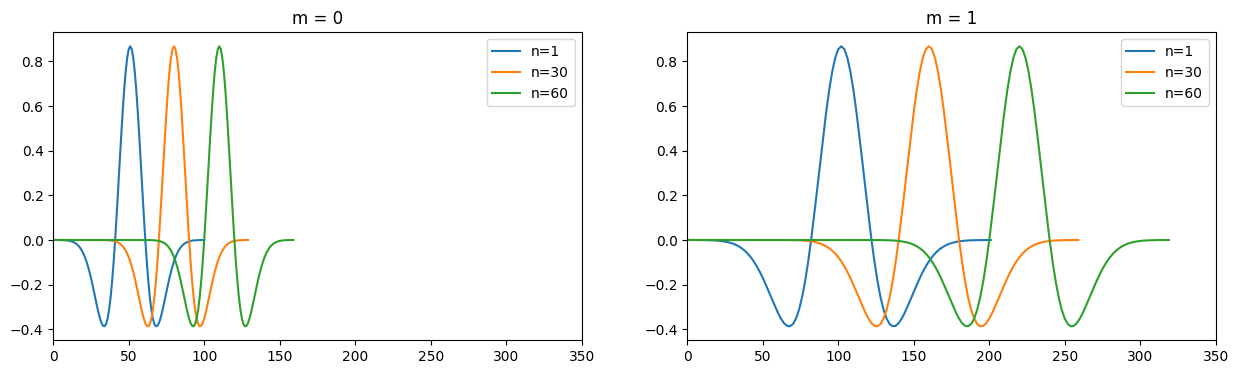

In [47]:
# we assume a0 = 2 and b0 = 1
# These are the scaling and translation factors
#using just o pair, means an specific wavelet
def psi_mn(psi, m, n):
    a = 2**m
    b = n*2**m
    wav = np.zeros(len(psi)*a + b)
    wav[b:b+len(psi)*a] = np.interp(np.arange(len(psi)*a)/a,np.arange(len(psi)),psi)
    return wav

psi = mexican_hat(np.arange(-5,5,0.1),0,1)
xlim = (0,350)
ns = [1, 30, 60]
ms = [0, 1]
plt.figure(figsize=(15,4))
plt.subplot(121)

for mi in range(len(ms)):
    m = ms[mi]
    plt.subplot(1,len(ms),mi+1)
    for n in ns:
        plt.plot(psi_mn(psi, m, n), label="n="+str(n))
    plt.title("m = "+str(m))
    plt.legend(loc="best")
    plt.xlim(xlim)
plt.show()

### 3.2.2 completa el siguiente código para realizar la transformada


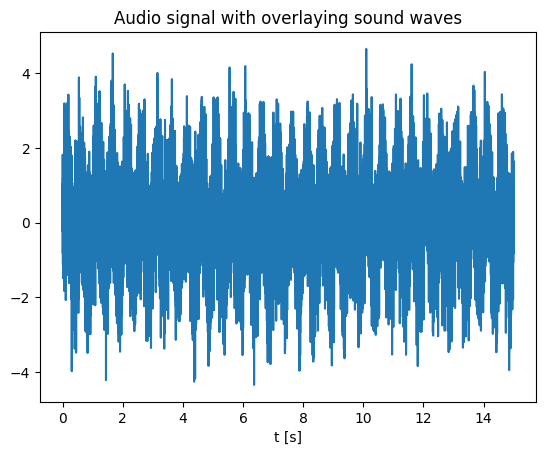

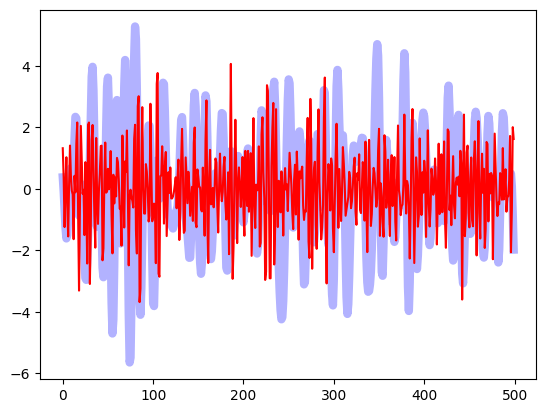

In [40]:

import numpy as np
import matplotlib.pyplot as plt

def twav_mn(f, psi, m, n):
    transform_scaled = np.sum(f * psi((np.arange(len(f)) - n) / m))
    return transform_scaled

def twav_mn_naive(f, psi, m, n):
    transform = np.sum(f * psi(np.arange(len(f)) - n))
    return transform

def mexican_hat_wavelet(t):
    return (1 - t**2) * np.exp(-t**2 / 2)

m = 3  # single value for m
ns = np.arange(1000, 1500)
res = 1000  # resolution
freq = 2  # frequency

# Creating a wave to analyze
x = np.arange(0, 15000, 1)
noise = np.random.normal(0, 1, len(x))
audio = np.sin(np.arange(15000) * 2 * np.pi * freq / res) + noise

transformed_sweep = [twav_mn(audio, mexican_hat_wavelet, m, n) for n in ns]
naive_transformed_sweep = [twav_mn_naive(audio, mexican_hat_wavelet, m, n) for n in ns]

plt.plot(np.arange(len(audio), dtype="float32") / res, audio)
plt.xlabel("t [s]")
plt.title("Audio signal with overlaying sound waves")
plt.show()

plt.plot(transformed_sweep, color="blue", lw=6, alpha=0.3)
plt.plot(naive_transformed_sweep, "r-")
plt.show()


### 3.2 Wavelet usando librería
<p align="justify">
Usa la librería PyWavelets (pywt) con los datos provenientes del dataset  = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat". Estos datos son históricos sobre el fenómeno del Niño. 

0. Debes descargar los datos desde python, usando numpy o pandas, debes aplicar la transformada continua pywt.cwt.

1. Obtendrás los coeficientes de la transformación.
2. Debes poner todos los resultados en términos de potencia. 
3. Debes graficar el resultado tanto en el periodo como en la frecuencia usando un plot tipo contour.

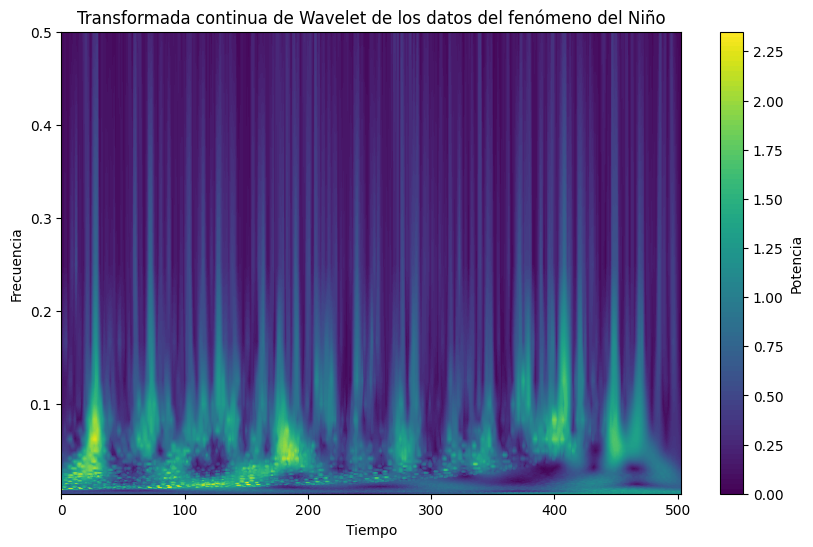

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
import requests

# Descargar los datos
url = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"
response = requests.get(url)
data = response.content.decode('utf-8').split('\n')

# Eliminar líneas vacías y convertir a array numpy
data = np.array([float(line.strip()) for line in data if line.strip()])

# Aplicar la transformada continua de Wavelet
wavelet = 'cmor'  # Tipo de wavelet a utilizar
scales = np.arange(1, 128)  # Escalas a utilizar
coef, freqs = pywt.cwt(data, scales, wavelet)

# Calcular la potencia de los coeficientes
power = (np.abs(coef)) ** 1

# Graficar el resultado en términos de potencia
plt.figure(figsize=(10, 6))
plt.contourf(np.arange(len(data)), freqs, power, levels=100)
plt.colorbar(label='Potencia')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia')
plt.title('Transformada continua de Wavelet de los datos del fenómeno del Niño')
plt.show()


### 3.3 Interpreta los resultados del punto anterior.
<p align="justify">
Debes explicar que significa el gráfico obtenido  en términos del periodo o frecuencia del evento que estamos analizando.

El gráfico de contorno muestra cómo varía la energía en diferentes frecuencias a lo largo del tiempo en los datos del fenómeno del Niño. Las áreas más claras indican mayor influencia de ciertas frecuencias en momentos específicos, mientras que las líneas horizontales representan patrones estacionales. Las concentraciones de potencia señalan eventos importantes, y las variaciones a lo largo del tiempo revelan cambios en la intensidad del fenómeno. 


## 4. Referencias
<p align="justify">

https://notebook.community/CSchoel/learn-wavelets/wavelet-introduction

https://www.kaggle.com/code/asauve/a-gentle-introduction-to-wavelet-for-data-analysis

https://pywavelets.readthedocs.io/en/latest/ref/cwt.html

[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Cancelación de ruido en datos] https://towardsdatascience.com/noise-cancellation-with-python-and-fourier-transform-97303314aa71

[Convolución en Scipy]https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html

[Wavelet transform applications]https://scicoding.com/introduction-to-wavelet-transform-using-python/